 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_path = Path('whale_returns.csv')

whale_returns = pd.read_csv(whale_returns_path, index_col = "Date", parse_dates = True, infer_datetime_format = True)

In [3]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns = whale_returns.dropna()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [5]:
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns_path = Path('algo_returns.csv')

algo_returns = pd.read_csv(algo_returns_path, index_col = "Date", parse_dates = True, infer_datetime_format = True)

In [7]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns = algo_returns.dropna()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [9]:
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
sp500_history_path = Path('sp500_history.csv')
sp500_history = pd.read_csv(sp500_history_path, index_col = "Date", parse_dates = True, infer_datetime_format = True)


In [11]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
sp500_history["Close"] = sp500_history["Close"].str.replace("$","")
sp500_history["Close"]

<ipython-input-12-04781253fed0>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_history["Close"] = sp500_history["Close"].str.replace("$","")


Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: object

In [13]:
sp500_history["Close"] = sp500_history["Close"].astype("float")

sp500_history.dtypes

Close    float64
dtype: object

In [14]:
# Calculate Daily Returns

sp500_daily_returns = sp500_history.pct_change()
sp500_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [15]:
# Drop nulls
sp500_daily_returns = sp500_daily_returns.dropna()

In [16]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.rename(columns = {"Close":"S&P 500 Daily Returns"}, inplace = True)

sp500_daily_returns.head()

,S&P 500 Daily Returns
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's 
# returns.
combined_df = pd.concat([whale_returns, algo_returns, sp500_daily_returns], axis = "columns", join = "inner")
combined_df.sort_index(inplace = True)
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

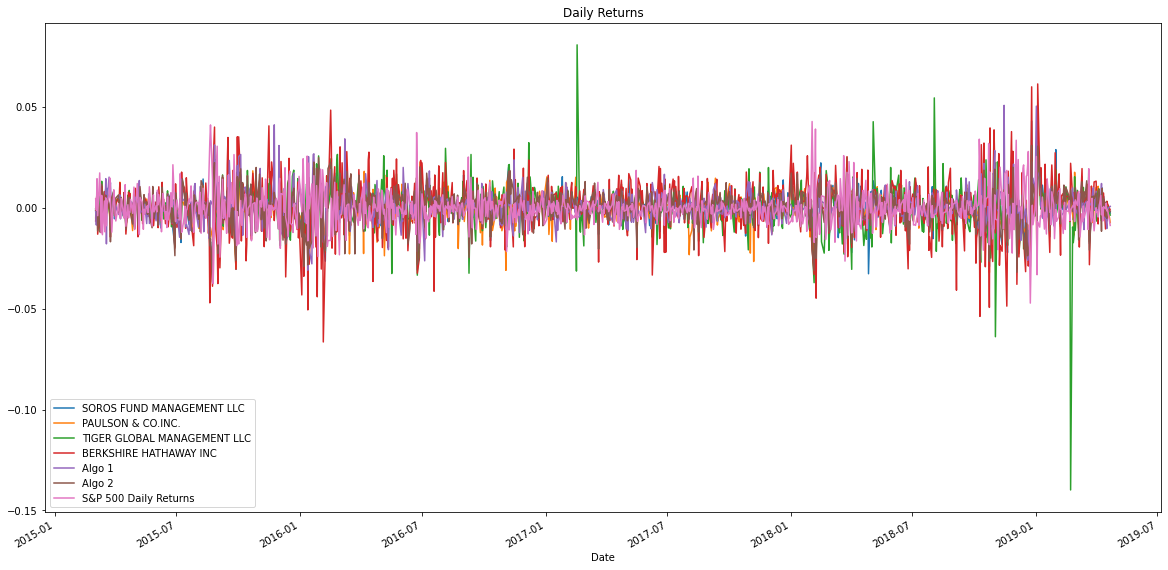

In [18]:
# Plot daily returns of all portfolios
combined_df.plot(figsize = (20,10), title='Daily Returns')

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

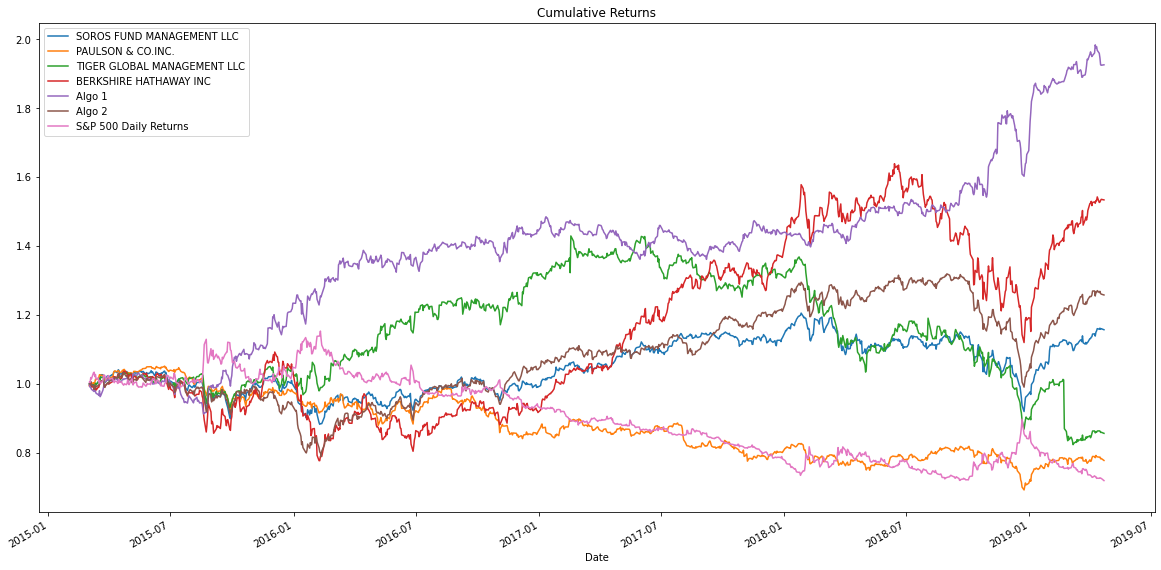

In [19]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize = (20, 10), title='Cumulative Returns')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

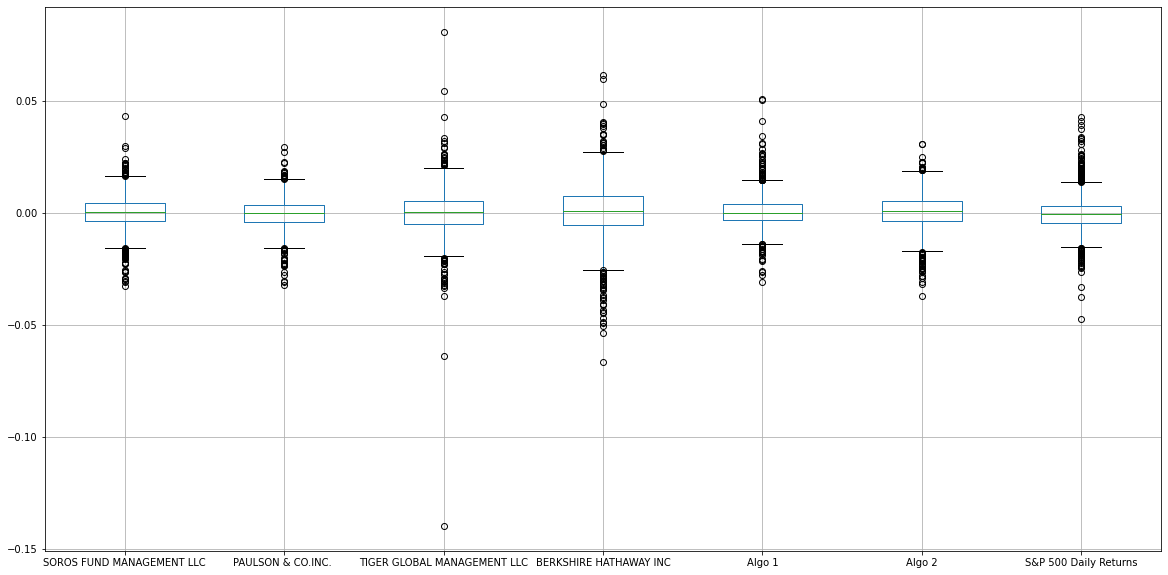

In [20]:
# Box plot to visually show risk
combined_df.boxplot(figsize=(20, 10))

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
st_dev = combined_df.std()
st_dev.sort_values(inplace=True)
st_dev

PAULSON & CO.INC.              0.007026
Algo 1                         0.007623
SOROS FUND MANAGEMENT LLC      0.007896
Algo 2                         0.008341
S&P 500 Daily Returns          0.008587
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [22]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = combined_df['S&P 500 Daily Returns'].std()
print(sp500_std)

# Determine which portfolios are riskier than the S&P 500
st_dev > sp500_std

0.00858688974707399


PAULSON & CO.INC.              False
Algo 1                         False
SOROS FUND MANAGEMENT LLC      False
Algo 2                         False
S&P 500 Daily Returns          False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
dtype: bool

### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days)
volatility = combined_df.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

PAULSON & CO.INC.              0.111527
Algo 1                         0.121006
SOROS FUND MANAGEMENT LLC      0.125348
Algo 2                         0.132413
S&P 500 Daily Returns          0.136313
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

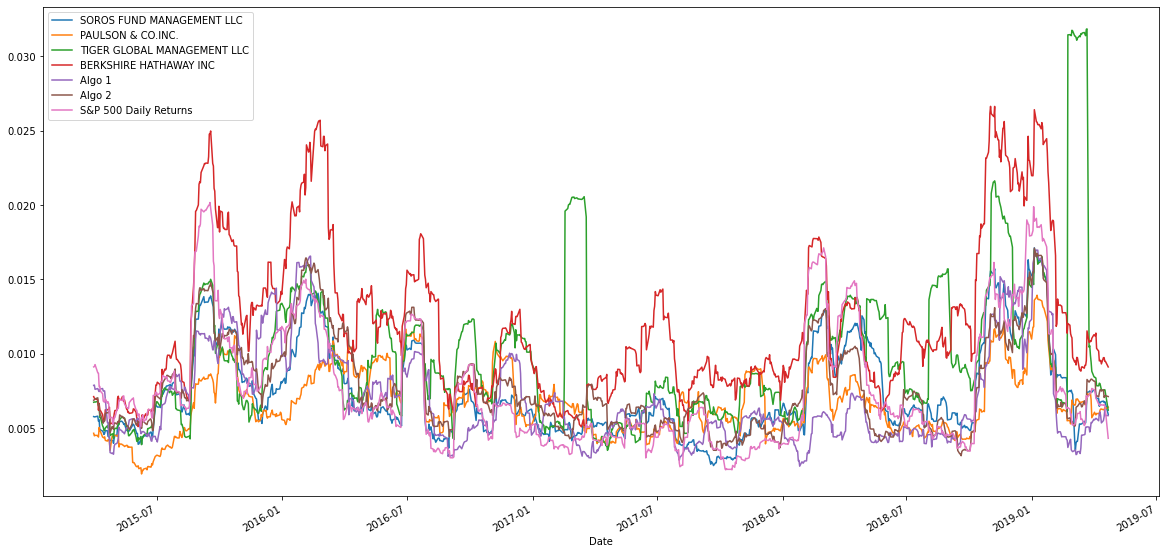

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_rstd = combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
combined_rstd.plot(figsize=(20, 10))

### Calculate and plot the correlation

In [25]:
# Calculate the correlation
correlation = combined_df.corr()

# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500 Daily Returns,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'60 Day Rolling Beta for Algo 1'}, xlabel='Date'>

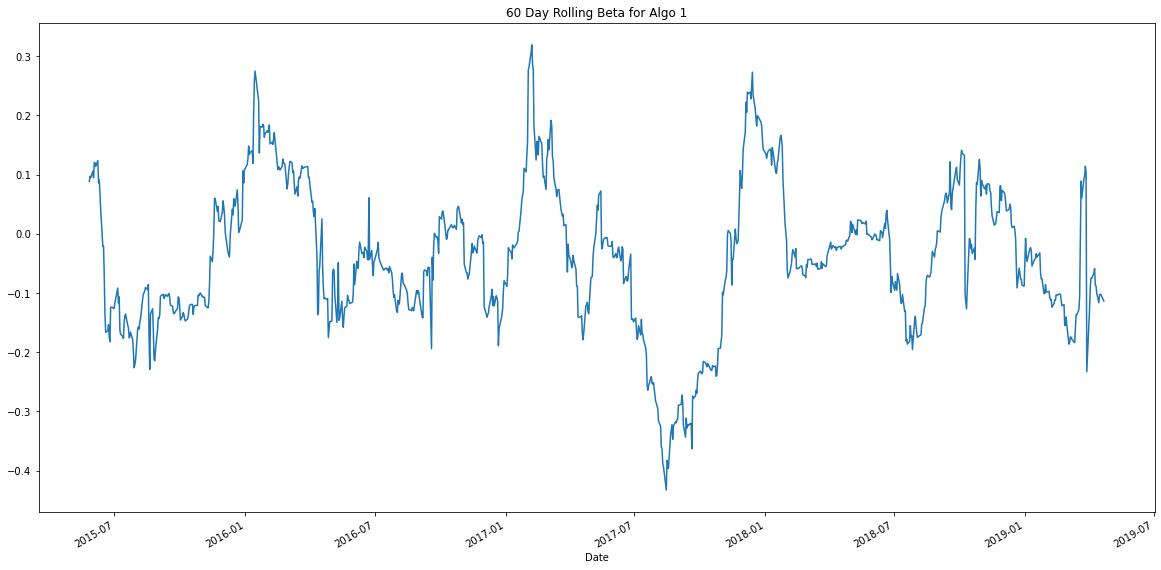

In [26]:
# Calculate covariance of a single portfolio
algo1_covariance = combined_df['Algo 1'].rolling(window=60).cov(combined_df['S&P 500 Daily Returns'])

# Calculate variance of S&P 500
variance = combined_df['S&P 500 Daily Returns'].rolling(window=60).var()

# Computing beta
algo1_beta = algo1_covariance / variance

# Plot beta trend
algo1_beta.plot(figsize=(20,10), title='60 Day Rolling Beta for Algo 1')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

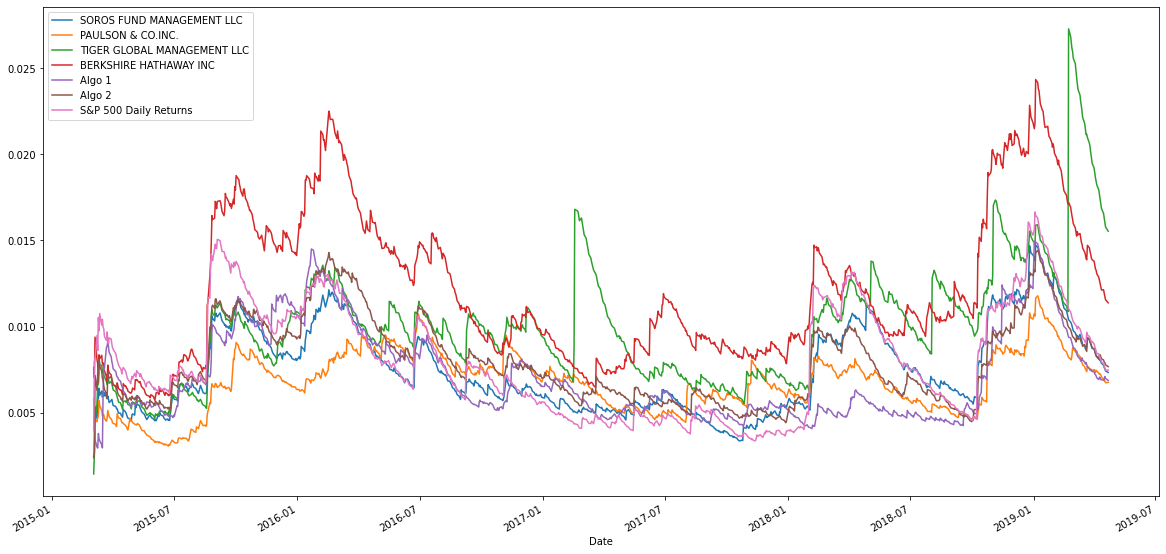

In [27]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21).std().plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [28]:
# Annualized Sharpe Ratios
sharpe = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500 Daily Returns         -0.518582
dtype: float64

<AxesSubplot:>

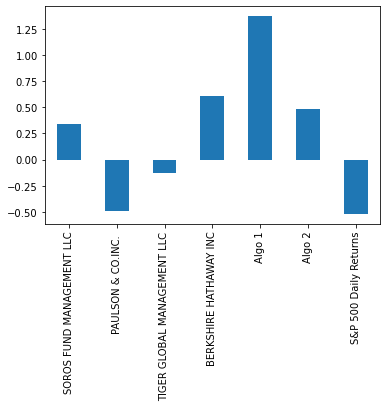

In [29]:
# Visualize the sharpe ratios as a bar plot
sharpe.plot(kind='bar')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [30]:
# Reading data from 1st stock
GSK_path = Path('GSK1.csv')
GSK = pd.read_csv(GSK_path, index_col = "Date", parse_dates = True, infer_datetime_format = True)

In [31]:
# Reading data from 2nd stock
Merck_path = Path('Merck1.csv')
Merck = pd.read_csv(Merck_path, index_col = "Date", parse_dates = True, infer_datetime_format = True)

In [32]:
# Reading data from 3rd stock
Pfizer_path = Path('Pfizer1.csv')
Pfizer = pd.read_csv(Pfizer_path, index_col = "Date", parse_dates = True, infer_datetime_format = True)

In [33]:
# Combine all stocks in a single DataFrame
pharma_df = pd.concat([GSK, Merck, Pfizer], axis = "columns", join = "inner")

In [34]:
# Reset Date index
pharma_df.index = pharma_df.index.date #Remove the timestamp from date column
pharma_df.head()

,Close,Close,Close
2018-01-02,36.93,53.61,34.52
2018-01-03,36.79,53.53,34.78
2018-01-04,36.86,54.40,34.85
2018-01-05,37.51,54.34,34.92
2018-01-08,37.40,54.03,34.53


In [50]:
# Reorganize portfolio data by having a column per symbol
pharma_df.columns = ["GSK", "Merck", "Pfizer"]
pharma_df.head()

,GSK,Merck,Pfizer
2018-01-02,36.93,53.61,34.52
2018-01-03,36.79,53.53,34.78
2018-01-04,36.86,54.40,34.85
2018-01-05,37.51,54.34,34.92
2018-01-08,37.40,54.03,34.53


In [51]:
# Calculate daily returns
pharma_daily_returns = pharma_df.pct_change()

# Drop NAs
pharma_daily_returns.dropna()

# Display sample data
pharma_daily_returns.head()

,GSK,Merck,Pfizer
2018-01-02,NaN,NaN,NaN
2018-01-03,-0.003791,-0.001492,0.007532
2018-01-04,0.001903,0.016253,0.002013
2018-01-05,0.017634,-0.001103,0.002009
2018-01-08,-0.002933,-0.005705,-0.011168


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [52]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
pharma_wtreturns = pharma_daily_returns.dot(weights)

# Display sample data
pharma_wtreturns = pharma_wtreturns.dropna()
pharma_wtreturns.head()

2018-01-03    0.000750
2018-01-04    0.006723
2018-01-05    0.006180
2018-01-08   -0.006602
2018-01-09   -0.003595
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [60]:
# Join your returns DataFrame to the original returns DataFrame
pharma_combined = pd.concat([combined_df, pharma_wtreturns], axis = "columns", join = "inner")
pharma_combined.sort_index(inplace = True)
pharma_combined = pharma_combined.rename(columns={pharma_combined.columns[-1]: 'Custom'})

In [61]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
pharma_combined.dropna()
pharma_combined.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Returns,Custom
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,-0.004012,0.000750
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,-0.006985,0.006723
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.001660,0.006180
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001301,-0.006602
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.001113,-0.003595


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [62]:
# Calculate the annualized `std`
volatility = pharma_combined.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

PAULSON & CO.INC.              0.117343
Algo 1                         0.121886
Algo 2                         0.140237
SOROS FUND MANAGEMENT LLC      0.150687
Custom                         0.158300
S&P 500 Daily Returns          0.162421
TIGER GLOBAL MANAGEMENT LLC    0.222843
BERKSHIRE HATHAWAY INC         0.233851
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

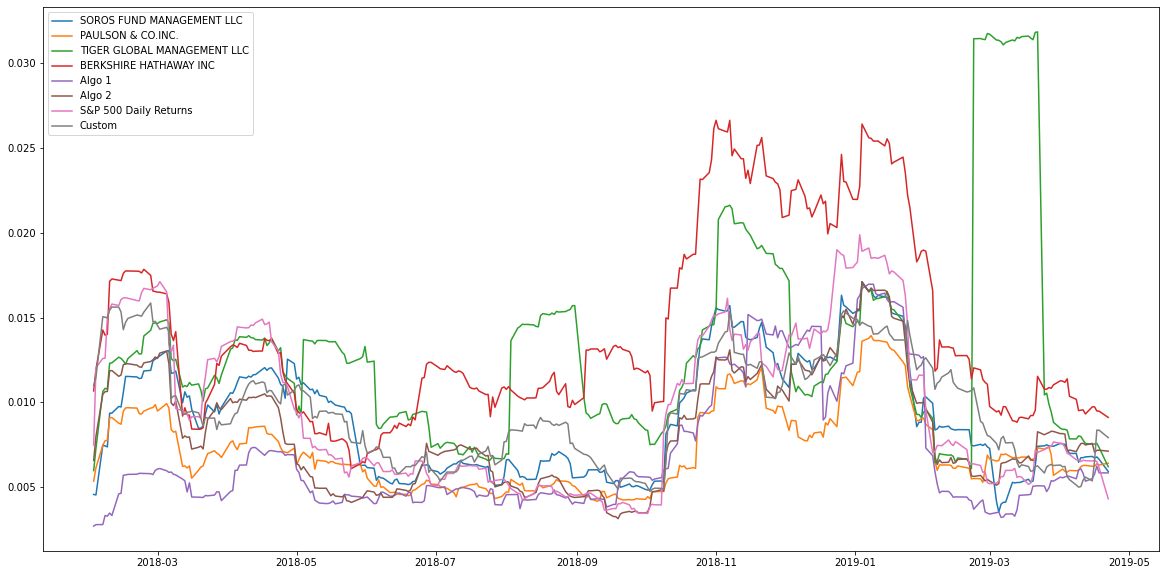

In [63]:
# Calculate rolling standard deviation
rolling_std = pharma_combined.rolling(window=21).std()

# Plot rolling standard deviation
rolling_std.plot(figsize=(20, 10))

### Calculate and plot the correlation

<AxesSubplot:>

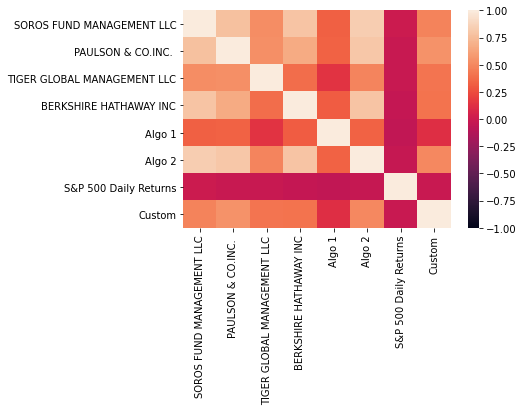

In [64]:
# Calculate and plot the correlation
correlation = pharma_combined.corr()
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

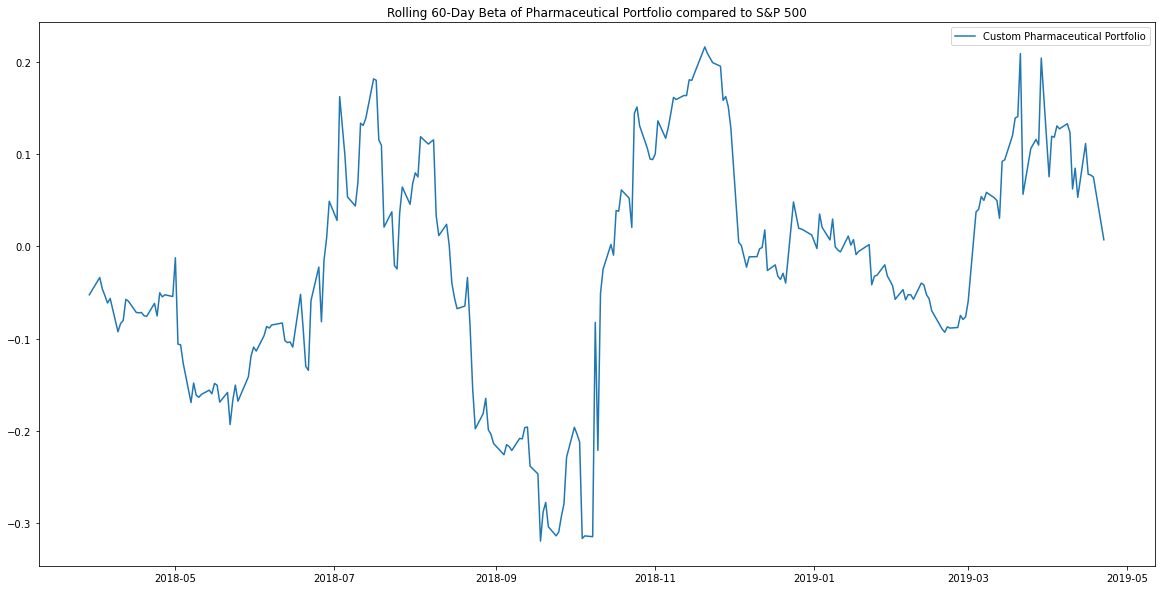

In [67]:
# Calculate and plot Beta
# Calculation of covariance 
rolling_custom_covariance = pharma_combined['Custom'].rolling(window=60).cov(pharma_combined['S&P 500 Daily Returns'])


# Calculation of 60-day rolling variance of S&P 500
rolling_variance = pharma_combined['S&P 500 Daily Returns'].rolling(window=60).var()

# Calculation 60-day rolling beta 
rolling_custom_beta = rolling_custom_covariance / rolling_variance

# Plotting Betas
ax = rolling_custom_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Pharmaceutical Portfolio compared to S&P 500')

# Set the legend of the figure
ax.legend(["Custom Pharmaceutical Portfolio"])

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [68]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = (pharma_combined.mean() * 252) / (pharma_combined.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.107071
PAULSON & CO.INC.             -0.232653
TIGER GLOBAL MANAGEMENT LLC   -1.352704
BERKSHIRE HATHAWAY INC         0.396695
Algo 1                         1.904971
Algo 2                         0.188529
S&P 500 Daily Returns         -0.291352
Custom                         0.781371
dtype: float64

<AxesSubplot:>

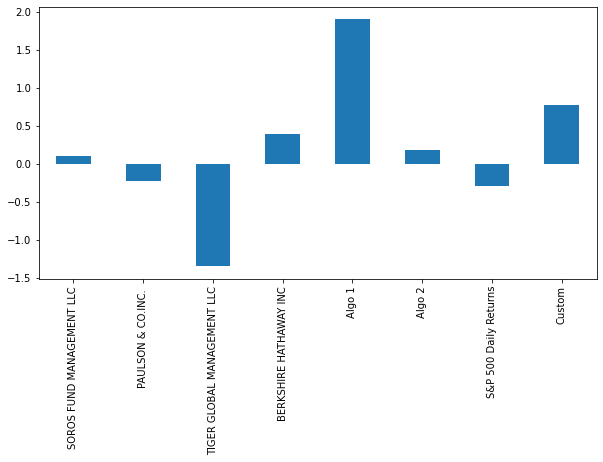

In [69]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', figsize=(10, 5))

### How does your portfolio do?

Write your answer here!

In [ ]:
# Given the Sharpe Ratios for the three pharmaceutical stocks in the portfolio, I would say those three stocks would be good 
# investments for the portfolio.  The custom porfolio, has a Sharpe Ratio higher than the S&P 500 over this particular
# time period making them more attractive investments.